In [1]:
# Turn off Windows smart screen
# Turn off File security system
# Change power options to make sure that the computer doesn't sleep
# Connect the power cable

In [2]:
from __future__ import division
#%matplotlib inline
import re
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pymysql
import scipy.stats
from sklearn import linear_model
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
import os
import random
import itertools
import warnings
import shutil
warnings.filterwarnings("ignore")

In [6]:
try:
    os.unlink(os.path.join(r'C:\Users\vbask\Documents\Darts_IP\Darts_IP\Factories\German_Factory_Code\germanFactory', 'mylog.log'))
except:
    print "Log file not found"

Log file not found


In [5]:
import logging
logger = logging.getLogger()
os.chdir(r'C:\Users\vbask\Documents\Darts_IP\Darts_IP\Factories\German_Factory_Code\germanFactory')
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)


logging.info('Logging starts')



In [5]:

print "Welcome to Darts-ip database re-OCRing"
print "Enter the language:",
lang = raw_input()
print "Enter the number of files to be cleansed"
no_files=raw_input()
query = "SELECT textdata, filename, decision_fk FROM plaintext WHERE fulltextdarts.plaintext.language='"+str(lang)+ "' LIMIT "  +str(no_files)+";"

logging.info("The SQL query executed is:")
logging.info(query)

Welcome to Darts-ip database re-OCRing
Enter the language:de
 Enter the number of files to be cleansed
10


In [6]:
logging.info('Training the Quality Detection algorithm')
german_train_path="C:\\Users\\vbask\\Documents\\Darts_IP\\Darts_IP\\English_Decisions_Distribution\\German Training files"

os.chdir(german_train_path)

X_array=pickle.load(open("X_array.p","rb"))
training_poor_fk=pickle.load(open("training_poor_fk.p","rb"))
training_poor_filename=pickle.load(open("training_poor_filename.p","rb"))
training_poor_text=pickle.load(open("training_poor_text.p","rb"))
training_poor_text_processed=pickle.load(open("training_poor_text_processed.p","rb"))
X_array_training_poor=pickle.load(open("X_array_training_poor.p","rb"))

training_wrong_lang_fk=pickle.load(open("training_wrong_lang_fk.p","rb"))
training_wrong_lang_filename=pickle.load(open("training_wrong_lang_filename.p","rb"))
training_wrong_lang_text=pickle.load(open("training_wrong_lang_text.p","rb"))
training_wrong_lang_text_processed=pickle.load(open("training_wrong_lang_text_processed.p","rb"))
X_array_training_wrong_lang=pickle.load(open("X_array_training_wrong_lang.p","rb"))

training_good_fk=pickle.load(open("training_good_fk.p","rb"))
training_good_filename=pickle.load(open("training_good_filename.p","rb"))
training_good_text=pickle.load(open("training_good_text.p","rb"))
training_good_text_processed=pickle.load(open("training_good_text_processed.p","rb"))
X_array_training_good=pickle.load(open("X_array_training_good.p","rb"))

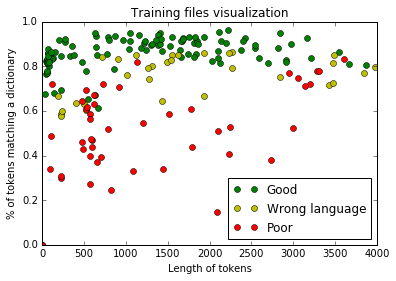

In [7]:
# plt.plot(X_array_training_good[:,1],X_array_training_good[:,0],'go',label="Good")
# plt.plot(X_array_training_wrong_lang[:,1],X_array_training_wrong_lang[:,0],'yo',label="Wrong language")
# plt.plot(X_array_training_poor[:,1],X_array_training_poor[:,0],'ro',label="Poor")

# plt.legend(loc='lower right')
# plt.xlabel('Length of tokens')
# plt.ylabel('% of tokens matching a dictionary')
# plt.title('Training files visualization')
# plt.xlim(0,4000)
# plt.show()

In [8]:
X_array_training=np.vstack((X_array_training_poor,X_array_training_wrong_lang,X_array_training_good))
Y_array_training=[0 for i in range(len(X_array_training_poor))]+[0 for i in range(len(X_array_training_wrong_lang))]+[2 for i in range(len(X_array_training_good))]

In [9]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

scaler=preprocessing.StandardScaler().fit(X_array_training)
X_array_training_scaled=scaler.transform(X_array_training)

#clf = svm.SVC(class_weight={0:7,2:1},kernel='rbf',gamma=3)
clf = svm.SVC(class_weight={0:7,2:1},kernel='linear')
clf.fit(X_array_training_scaled,Y_array_training)


SVC(C=1.0, cache_size=200, class_weight={0: 7, 2: 1}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# # create a mesh to plot in
# h=0.005
# x_min, x_max = X_array_training_scaled[:, 0].min()-1, X_array_training_scaled[:, 0].max()+1
# y_min, y_max = X_array_training_scaled[:, 1].min()-1, X_array_training_scaled[:, 1].max()+1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


# inp=np.c_[xx.ravel(), yy.ravel()]
# inp_pred=clf.predict(inp)

(-1.5, 1.5)

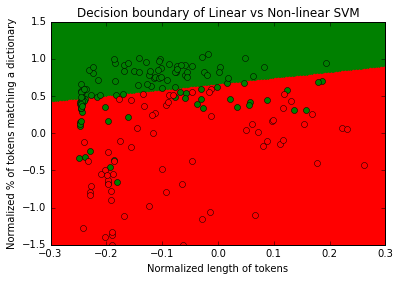

In [12]:
# inp_pred=clf.predict(inp)
# plt.plot(inp[inp_pred==2][:,1],inp[inp_pred==2][:,0],'g.')
# plt.plot(inp[inp_pred==0][:,1],inp[inp_pred==0][:,0],'r.')
# plt.plot(X_array_training_scaled[np.asarray(Y_array_training)==2][:,1],X_array_training_scaled[np.asarray(Y_array_training)==2][:,0],'go')
# plt.plot(X_array_training_scaled[np.asarray(Y_array_training)==0][:,1],X_array_training_scaled[np.asarray(Y_array_training)==0][:,0],'ro')
# plt.xlabel('Normalized length of tokens')
# plt.ylabel('Normalized % of tokens matching a dictionary')
# plt.title('Decision boundary of Linear vs Non-linear SVM')
# plt.xlim(-0.3,0.3)
# plt.ylim(-1.5,1.5)

In [14]:
logging.info('Training completed')
logging.info('Connecting to the SQL Server')
try:
    db = pymysql.connect(host="localhost", port=3320, user="ops", passwd="target", db="fulltextdarts", charset="utf8")
    cursor = db.cursor()
except:
    logging.error("Unable to connect the SQL server")
    db = pymysql.connect(host="localhost", port=3320, user="ops", passwd="target", db="fulltextdarts", charset="utf8")
    cursor = db.cursor()

import unicodedata
import sys

tbl = dict.fromkeys(i for i in xrange(sys.maxunicode)
                      if unicodedata.category(unichr(i)).startswith('P'))
def remove_punctuation(text):
    return text.translate(tbl)

def extract_quality_features(text,dictionary_words,show=1):
    percent_tokens=[]
    len_tokens=[]
    text_processed=[]
    for i in np.arange(len(text)):
        temp=text[i].replace(u"\u2018", "").replace(u"\u2019", "").replace(u"\n"," ")
        tokens=temp.split()
        tokens=[remove_punctuation(word.lower()) for word in tokens]
        punctuations = re.compile(r'[-./?!,--&":;()|0-9]')
        tokens=[punctuations.sub("", word) for word in tokens if punctuations.sub("", word)]
        text_processed.append(" ".join(tokens))
        len_tokens.append(len(tokens))   

    vect=CountVectorizer(vocabulary=dictionary_words)
    X_counts=vect.transform(text_processed)
    X_counts_sum=X_counts.sum(axis=1)
    X_counts_sum = np.squeeze(np.asarray(X_counts_sum))

    percent_tokens=[]
    for i in range(len(text)):
        temp=X_counts_sum[i]/len_tokens[i]
        if np.isfinite(temp):
            percent_tokens.append(temp if temp<1 else 1)
        else:
            percent_tokens.append(0)
    if show:
        print "Do nothing"
        #plt.plot(len_tokens,percent_tokens,'.')
        #plt.ylim(0,1)
        #plt.xlim(0,4000)
        #plt.xlabel('Length of the Document')
        #plt.ylabel('% of words matching dictionary')
        #plt.title(str(len(percent_tokens))+' documents features plot')
        #plt.show()
    return percent_tokens,len_tokens,text_processed

In [15]:
os.chdir(r'C:\Users\vbask\Documents\Darts_IP\Darts_IP\Dictionaries')
logging.info('Loading Latin Russian Dictionary')
dictionary_words=pickle.load(open("latin_rus_dic.p","rb"))

In [16]:
#query ="SELECT textdata, filename, decision_fk FROM plaintext WHERE fulltextdarts.plaintext.language='de' LIMIT 1;"
# db = pymysql.connect(host="localhost", port=3320, user="ops", passwd="target", db="fulltextdarts", charset="utf8")
# cursor = db.cursor()
logging.info('Executing SQL Query')
cursor.execute(query)

test_text=[];test_text_filename=[];test_text_fk=[]
for row in cursor:
    test_text.append(row[0])
    test_text_filename.append(row[1])
    test_text_fk.append(row[2])
if len(test_text)==1:
    test_text.append('')
    test_text_filename.append('')
    test_text_fk.append('')

In [17]:
logging.info("Extracting features from the test files")
test_percent_tokens,test_len_tokens,test_text_processed=extract_quality_features(test_text,dictionary_words)
X_array_test=np.vstack((np.asarray(test_percent_tokens),np.asarray(test_len_tokens))).T
X_array_test_scaled=scaler.transform(X_array_test)
logging.info("Successfully extracted features from the test file")

Do nothing


In [18]:
logging.info("Predicting the quality of the test files")
clf = svm.SVC(class_weight={0:7,2:1},kernel='linear')
clf.fit(X_array_training_scaled,Y_array_training)
X_array_test_pred_7=clf.predict(X_array_test_scaled)
X_array_test_pred=X_array_test_pred_7

# plt.plot(X_array_test[X_array_test_pred==2][:,1],X_array_test[X_array_test_pred==2][:,0],'g.')
# plt.plot(X_array_test[X_array_test_pred==0][:,1],X_array_test[X_array_test_pred==0][:,0],'r.')

# plt.xlabel('Test length of tokens')
# plt.ylabel('Test % of tokens matching a dictionary')
# plt.title('Decision boundary of Linear SVM for test data')

# plt.figure()
# plt.plot(X_array_test_scaled[X_array_test_pred==2][:,1],X_array_test_scaled[X_array_test_pred==2][:,0],'g.')
# plt.plot(X_array_test_scaled[X_array_test_pred==0][:,1],X_array_test_scaled[X_array_test_pred==0][:,0],'r.')

# plt.xlabel('Normalized test length of tokens')
# plt.ylabel('Normalized test % of tokens matching a dictionary')
# plt.title('Decision boundary of Linear SVM for normalized test data')



In [19]:
clf = svm.SVC(class_weight={0:1,2:1},kernel='linear')
clf.fit(X_array_training_scaled,Y_array_training)

X_array_test_pred_1=clf.predict(X_array_test_scaled)
X_array_test_pred=X_array_test_pred_1
# plt.plot(X_array_test[X_array_test_pred==2][:,1],X_array_test[X_array_test_pred==2][:,0],'g.')
# plt.plot(X_array_test[X_array_test_pred==0][:,1],X_array_test[X_array_test_pred==0][:,0],'r.')

# plt.xlabel('Test length of tokens')
# plt.ylabel('Test % of tokens matching a dictionary')
# plt.title('Decision boundary of Linear SVM for test data')

# plt.figure()
# plt.plot(X_array_test_scaled[X_array_test_pred==2][:,1],X_array_test_scaled[X_array_test_pred==2][:,0],'g.')
# plt.plot(X_array_test_scaled[X_array_test_pred==0][:,1],X_array_test_scaled[X_array_test_pred==0][:,0],'r.')

# plt.xlabel('Normalized test length of tokens')
# plt.ylabel('Normalized test % of tokens matching a dictionary')
# plt.title('Decision boundary of Linear SVM for normalized test data')



In [20]:
logging.info("Successfully predicted the quality of the test files")
batch_prior_filename=[fname for fname in list(np.asarray(test_text_filename)[X_array_test_pred_1!=X_array_test_pred_7])+list(np.asarray(test_text_filename)[np.asarray(test_len_tokens)<10])]
batch_non_prior_filename=list(set([fname for fname in list(np.asarray(test_text_filename)[X_array_test_pred_1==0])])-set(batch_prior_filename))

# print("Batch Prior")
# for fname in batch_prior_filename:
#     print(str(os.path.splitext(fname)[0])+",")
# print("Batch Non Prior")
# for fname in batch_non_prior_filename:
#     print(str(os.path.splitext(fname)[0])+",")

In [21]:
PDF_files_path=r"C:\Users\vbask\Documents\Darts_IP\Darts_IP\PDF_Files\DE_30000"
PDF_files_names=[f for f in os.listdir(PDF_files_path) if os.path.splitext(f)[1]==".pdf"]
downloaded_prior_path=r"C:\Users\vbask\Documents\Darts_IP\Darts_IP\Factories\German_Factory\1_Poor_downloaded\Batch_prior"
downloaded_non_prior_path=r"C:\Users\vbask\Documents\Darts_IP\Darts_IP\Factories\German_Factory\1_Poor_downloaded\Batch_non_prior"

In [22]:
logging.info("Deleting previous files in download prior and non-prior paths")
for root, dirs, files in os.walk(downloaded_prior_path):
    for f in files:
        os.unlink(os.path.join(root, f))
for root, dirs, files in os.walk(downloaded_non_prior_path):
    for f in files:
        os.unlink(os.path.join(root, f))
        

In [23]:
logging.info("Moving files based on priority")
for fname in batch_prior_filename:
    if fname in PDF_files_names:
        shutil.copy(PDF_files_path+"\\"+fname,downloaded_prior_path)

In [24]:
os.chdir("C:\\Users\\vbask\\Documents\\Darts_IP\\Darts_IP\\Factories\\German_Factory\\1_Poor_downloaded")
pickle.dump(X_array_test,open("X_array_test.p","wb"))
pickle.dump(test_text_filename,open("test_text_filename.p","wb"))

In [25]:
for fname in batch_non_prior_filename:
    if fname in PDF_files_names:
        shutil.copy(PDF_files_path+"\\"+fname,downloaded_non_prior_path)


In [26]:
logging.info("Finished Quality Assessment and moved files to the prior and non-prior download path")